In [2]:
%matplotlib notebook
import scipy.io as scio
from scipy import interpolate
import pylab, socket
import numpy as np
import matplotlib.pyplot as plt
import glob,os
import sys
import matplotlib as mpl
from tikzplotlib import save as tikz_save
mpl.rcParams['xtick.labelsize'] = 16;
mpl.rcParams['xtick.labelsize'] = 16;
mpl.rcParams['ytick.labelsize'] = 16;
mpl.rcParams['font.family'] = 'serif';
mpl.rcParams['axes.labelsize'] = 16
colorsk = plt.rcParams['axes.prop_cycle'].by_key()['color']
import ht

In [6]:
def deltaTx(x,Tc0,Tf0,UA,L,Cc,Cf):
    return (Tc0-Tf0)*np.exp(-UA*(1/Cc-1/Cf)*x/L)
    
    

$$\Delta T(x) = (T_{C,0}-T_{F,0})e^{-UA\left(\frac{1}{C_C}-\frac{1}{C_F}\right)\frac{x}{L}}$$




$$\dot Q=\varepsilon \dot Q_\max =\varepsilon C_\min\Delta T_\max = \varepsilon C_\min(T_{C,e}-T_{F,e})$$

$$Q = UA\Delta T_{LM}$$

$$Q = C_c |(T_{C,e} - T_{C,e})| = C_F |(T_{F,s} - T_{F,e})|  $$


In [38]:
Tfe = 5
Tcs = 30
Tce = 90

L = 10
xi = np.linspace(0,L,100)
Cc,Cf = (100.,300)

Qc = Cc*(Tce-Tcs)
Qf = Qc
Tfs = Tfe+Qf/Cf



C1 = np.min((Cc,Cf))
C2 = np.max((Cc,Cf))
Cr = C1/C2
Qmax = (Tce-Tfe)*C1
epsilon = Qc/Qmax


0.7058823529411765


In [39]:

Nut = ht.NTU_from_effectiveness(epsilon,Cr,subtype='counterflow')
UA = C1*Nut

Tcx = np.copy(xi)
Tcx[0] = Tce
for i,xii in enumerate(xi[:-2]):
    Tcx[i+1] = Tcx[0]+ np.trapz(-UA/Cc/L*deltaTx(xi[:i+1],Tce,Tfs,UA,L,Cc,Cf),xi[:i+1])
Tcx[-1]= Tcs

Tfx = np.copy(xi)
Tfx[0] = Tfs
for i,xii in enumerate(xi[:-2]):
    Tfx[i+1] = Tfx[0]+ np.trapz(-UA/Cf/L*deltaTx(xi[:i+1],Tce,Tfs,UA,L,Cc,Cf),xi[:i+1])
Tfx[-1]= Tfe

<IPython.core.display.Javascript object>


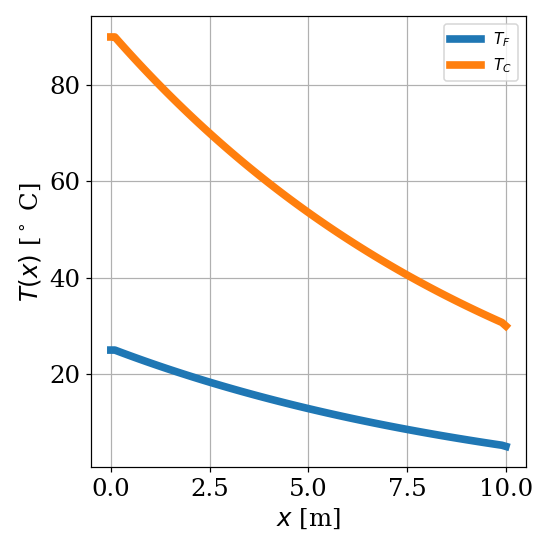

In [40]:
fig0,ax0 = plt.subplots(figsize=(5,5))

ax0.plot(xi,Tfx,label='$T_F$',linewidth=5);
ax0.plot(xi,Tcx,label='$T_C$',linewidth=5);

ax0.set_xlabel('$x$ [m]')
ax0.set_ylabel('$T(x)$ [$^\circ$ C]')
ax0.grid('minor')
ax0.legend()
fig0.tight_layout()
tikz_save('/home/juan/Documents/Ensenanza/latex/apuntes/intercambiadores/tikzs/counterflow_temp1.tikz')

In [20]:
Tfe = 10
Tcs = 15
Tce = 20

L = 10
xi = np.linspace(0,L,100)
Cc,Cf = (5.,12.5)
Qc = Cc*(Tce-Tcs)
Qf = Qc
Tfs = Tfe+Qf/Cf
C1 = np.min((Cc,Cf))
C2 = np.max((Cc,Cf))
Cr = C1/C2
Qmax = (Tce-Tfe)*C1
epsilon = Qc/Qmax


In [21]:
Qc,Qmax

(25.0, 50.0)

In [22]:
Nutp = ht.NTU_from_effectiveness(epsilon,Cr,subtype='parallel')
UAp = C1*Nutp

Tcxp = np.copy(xi)
Tcxp[0] = Tce
for i,xii in enumerate(xi[:]):
    Tcxp[i] = Tcxp[0]+ np.trapz(-UAp/Cc/L*deltaTx(xi[:i],Tce,Tfe,UAp,L,Cc,Cf),xi[:i])
#Tcxp[-1]= Tcs

Tfxp = np.copy(xi)
Tfxp[0] = Tfe
for i,xii in enumerate(xi[:]):
    Tfxp[i] = Tfxp[0]- np.trapz(-UAp/Cf/L*deltaTx(xi[:i],Tce,Tfe,UAp,L,Cc,Cf),xi[:i])
#Tfxp[-1]= Tfs

<IPython.core.display.Javascript object>


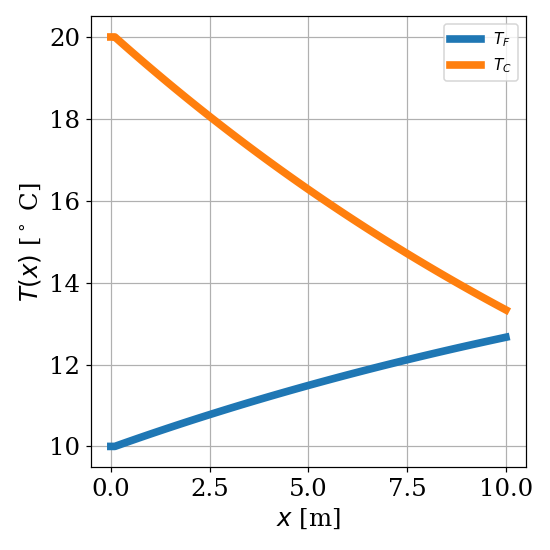

In [25]:
fig0,ax0 = plt.subplots(figsize=(5,5))

ax0.plot(xi,Tfxp,label='$T_F$',linewidth=5);
ax0.plot(xi,Tcxp,label='$T_C$',linewidth=5);

ax0.set_xlabel('$x$ [m]')
ax0.set_ylabel('$T(x)$ [$^\circ$ C]')
ax0.grid('minor')
ax0.legend()
fig0.tight_layout()
tikz_save('/home/juan/Documents/Ensenanza/latex/apuntes/intercambiadores/tikzs/parallel_temp1.tikz')

In [28]:
Tfe = 5
Tcs = 30
Tce = 90

L = 10
xi = np.linspace(0,L,100)
Cc,Cf = (100.,100)
Qc = Cc*(Tce-Tcs)
Qf = Qc
Tfs = Tfe+Qf/Cf
C1 = np.min((Cc,Cf))
C2 = np.max((Cc,Cf))
Cr = C1/C2
Qmax = (Tce-Tfe)*C1
epsilon = Qc/Qmax
print(epsilon)

0.7058823529411765


In [29]:

Nut = ht.NTU_from_effectiveness(epsilon,Cr,subtype='counterflow')
UA = C1*Nut

Tcx = np.copy(xi)
Tcx[0] = Tce
for i,xii in enumerate(xi[:-2]):
    Tcx[i+1] = Tcx[0]+ np.trapz(-UA/Cc/L*deltaTx(xi[:i+1],Tce,Tfs,UA,L,Cc,Cf),xi[:i+1])
Tcx[-1]= Tcs

Tfx = np.copy(xi)
Tfx[0] = Tfs
for i,xii in enumerate(xi[:-2]):
    Tfx[i+1] = Tfx[0]+ np.trapz(-UA/Cf/L*deltaTx(xi[:i+1],Tce,Tfs,UA,L,Cc,Cf),xi[:i+1])
Tfx[-1]= Tfe

<IPython.core.display.Javascript object>


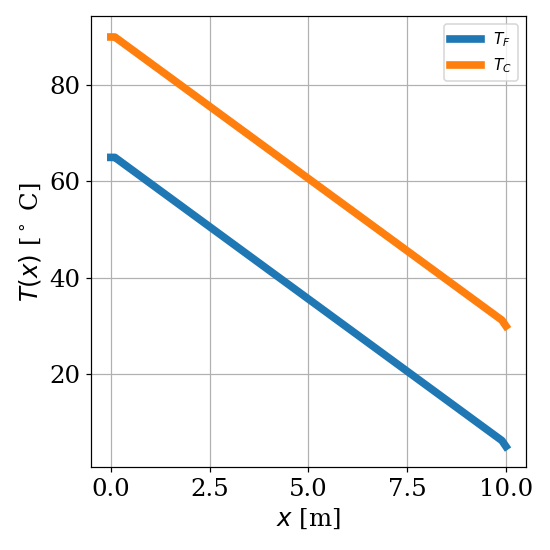

In [31]:
fig0,ax0 = plt.subplots(figsize=(5,5))

ax0.plot(xi,Tfx,label='$T_F$',linewidth=5);
ax0.plot(xi,Tcx,label='$T_C$',linewidth=5);

ax0.set_xlabel('$x$ [m]')
ax0.set_ylabel('$T(x)$ [$^\circ$ C]')
ax0.grid('minor')
ax0.legend()
fig0.tight_layout()
tikz_save('/home/juan/Documents/Ensenanza/latex/apuntes/intercambiadores/tikzs/counterflow_temp2.tikz')

<IPython.core.display.Javascript object>


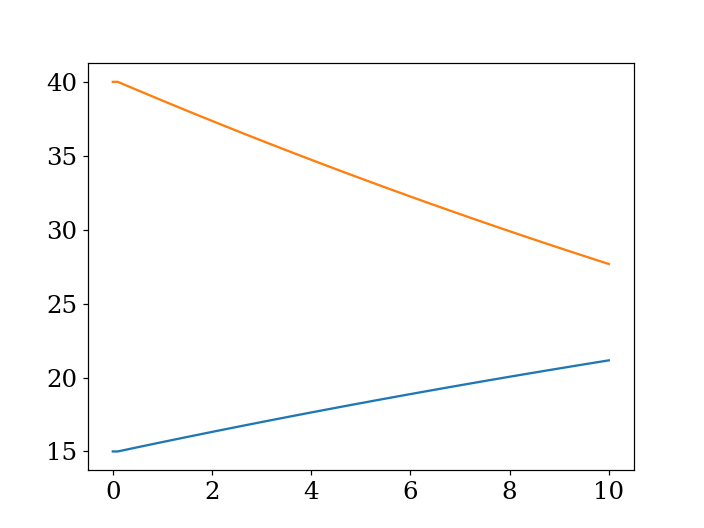

In [187]:
fig0,ax0 = plt.subplots()

#ax0.plot(xi,deltaTx(xi,Tce,Tfe,UA,L,Cc,Cf))
ax0.plot(xi,Tfxp)
ax0.plot(xi,Tcxp)

In [159]:

Cc,Cf = (0.1,0.011)


L = 10

Nut = U*A/ C1

Tf_i = np.linspace(Tfs,Tfe,100)
Tc_i = np.linspace(Tce,Tcs,100)
x_i = np.linspace(0,L,100)

deltaTx= np.exp(-U*A*x_i/L*(1/C1-1/C2))*(Tce-Tfs)
deltaTxp= np.exp(-U*A*x_i/L*(1/C1-1/C2))*(Tce-Tfe)

Tf_i = deltaTx+Tfe
Tc_i = deltaTx+Tce

Tf_ip = -deltaTxp+Tfs
Tc_ip = deltaTxp+Tce

<IPython.core.display.Javascript object>


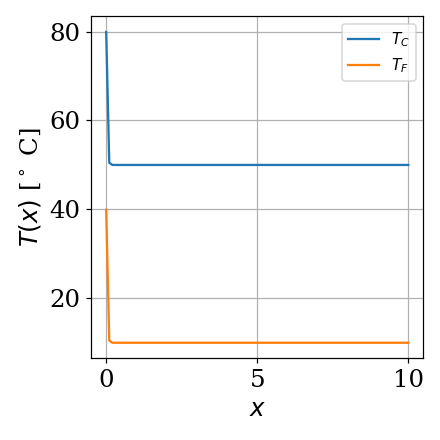

In [160]:
fig0,ax0 = plt.subplots(figsize=(4,4))
ax0.plot(x_i,Tc_i,label='$T_C$');
ax0.plot(x_i,Tf_i,label = '$T_F$');
ax0.set_xlabel('$x$')
ax0.set_ylabel('$T(x)$ [$^\circ$ C]')
ax0.grid('minor')
ax0.legend()
fig0.tight_layout()

In [161]:
Tfs

20.1010101010101

<IPython.core.display.Javascript object>


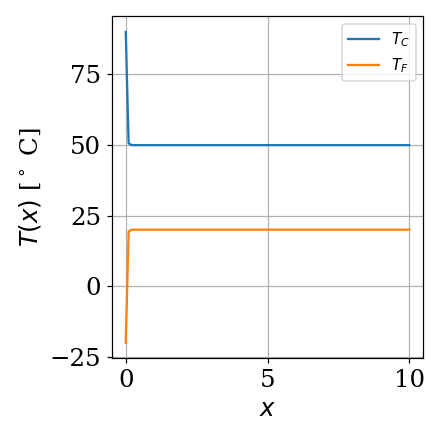

In [162]:
fig0,ax0 = plt.subplots(figsize=(4,4))
ax0.plot(x_i,Tc_ip,label='$T_C$');
ax0.plot(x_i,Tf_ip,label = '$T_F$');
ax0.set_xlabel('$x$')
ax0.set_ylabel('$T(x)$ [$^\circ$ C]')
ax0.grid('minor')
ax0.legend()
fig0.tight_layout()

In [120]:
Tfe = 10
Tcs = 40
Tce = 50
epsilon = 0.8
Cc,Cf = (1,.99)
Qc = Cc*(Tce-Tcs)
Qf = Qc
Tfs = Tfe+Qf/Cf
Tm = T
U = 10
A = 10
L = 1
Tf_i = np.linspace(Tfe,Tfs,100)
Tc_i = np.linspace(Tce,Tcs,100)

Qcx = Cc*(Tce-Tc_i)
Qfx = Qcx
Tfx = Tfe+Qfx/Cf

C1 = np.max((Cc,Cf))
C2 = np.min((Cf,Cc))
x_i = np.linspace(0,L,100)
Tf_i = Tc_i-np.exp(-U*A*x_i/L*(1/C2-1/C1))*(Tce-Tfe)

In [121]:
-np.exp(-U*A*x_i/L*(1/Cc-1/Cf))

array([-1.        , -1.01025527, -1.02061571, -1.0310824 , -1.04165642,
       -1.05233889, -1.06313091, -1.0740336 , -1.08504811, -1.09617557,
       -1.10741714, -1.118774  , -1.13024733, -1.14183832, -1.15354818,
       -1.16537813, -1.17732939, -1.18940322, -1.20160087, -1.21392361,
       -1.22637273, -1.23894951, -1.25165527, -1.26449133, -1.27745903,
       -1.29055972, -1.30379475, -1.31716552, -1.33067341, -1.34431982,
       -1.35810618, -1.37203393, -1.3861045 , -1.40031938, -1.41468003,
       -1.42918795, -1.44384466, -1.45865167, -1.47361054, -1.48872281,
       -1.50399007, -1.51941389, -1.53499589, -1.55073768, -1.56664091,
       -1.58270724, -1.59893833, -1.61533587, -1.63190157, -1.64863716,
       -1.66554438, -1.68262499, -1.69988076, -1.71731349, -1.734925  ,
       -1.75271713, -1.77069171, -1.78885063, -1.80719578, -1.82572906,
       -1.8444524 , -1.86336775, -1.88247709, -1.9017824 , -1.92128569,
       -1.94098899, -1.96089436, -1.98100386, -2.00131958, -2.02

<IPython.core.display.Javascript object>


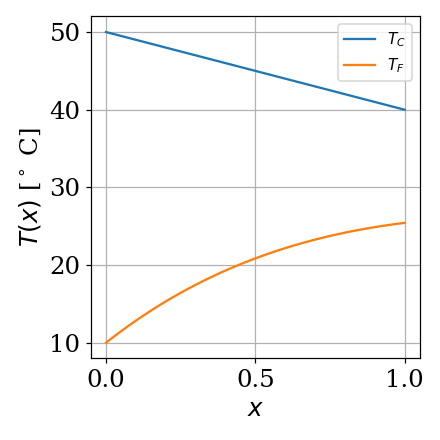

In [122]:
fig0,ax0 = plt.subplots(figsize=(4,4))
ax0.plot(x_i,Tc_i,label='$T_C$');
ax0.plot(x_i,Tf_i,label = '$T_F$');
ax0.set_xlabel('$x$')
ax0.set_ylabel('$T(x)$ [$^\circ$ C]')
ax0.grid('minor')
ax0.legend()
fig0.tight_layout()

In [102]:
ind_max1 = data[:-10,1].argmax()
ind_min1 = data[10:,1].argmin()+10

p1 = np.polyfit(data[:,0],data[:,1],7)
temps =np.linspace(data[0,0],data[-1,0],100)
curva1 = np.poly1d(p1)

<IPython.core.display.Javascript object>


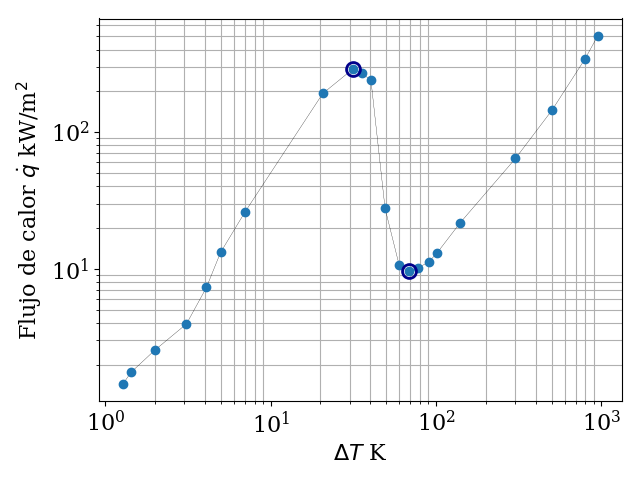

In [112]:
fig0,ax0 = plt.subplots()
ax0.loglog(data[:,0],data[:,1],'o',linestyle='-',markerfacecolor=colorsk[0],markeredgecolor=colorsk[0],color='k',linewidth=0.2)
ax0.loglog(data[ind_max1,0],data[ind_max1,1],color='darkblue',marker='o',markersize=10,markerfacecolor='none',markeredgewidth=2)
ax0.loglog(data[ind_min1,0],data[ind_min1,1],color='darkblue',marker='o',markersize=10,markerfacecolor='none',markeredgewidth=2)
ax0.grid(which='minor')
ax0.set_xlabel(r'$\Delta T$ K')
ax0.set_ylabel(r'Flujo de calor $\dot q$ kW/m$^2$')
fig0.tight_layout()
tikz_save('/home/juan/Documents/Ensenanza/latex/apuntes/ebullicion/tikzs/curva_ebullicion1.tikz')

<IPython.core.display.Javascript object>


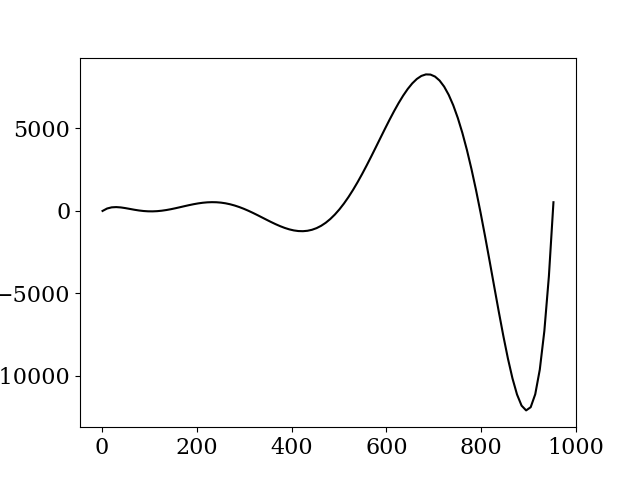

In [104]:
fig1,ax1 = plt.subplots()
ax1.plot(temps,curva1(temps),'k')

In [67]:
i

9